# Regresión con Bosques Aleatorios

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. 
Estos datos se recopilaron en 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.
Las características son:
- CRIM: Índice de criminalidad per capita
- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
- INDUS: Proporción de superficie de negocio no minorista.
- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a las autopistas radiales
- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
- PTRATIO: Ratio de alumnos por profesor
- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana
- LSTAT: Porcentaje de población de “estatus de bajo nivel”
- MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares)

El objetivo es predecir la mediana del valor de las viviendas (MEDV), basándose en las demás características

In [1]:
# Importa las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Carga los datos
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
# Transforma a un dataframe para visualizar
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['TARGET'] = target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
#Selecciona solamente la columna 6 del dataset en la variable X_adr
X_adr = data[:, np.newaxis, 5]

In [5]:
#Selecciona la columna target en la variable y_adr
y_adr = target

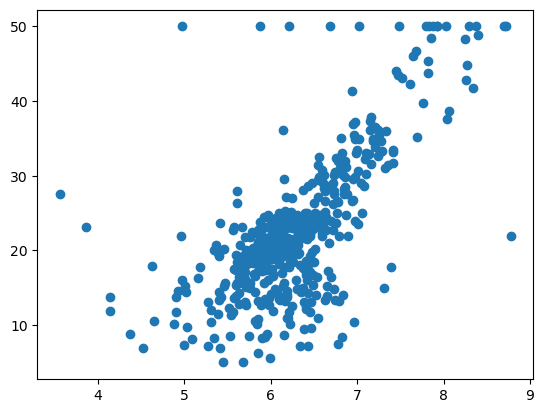

In [6]:
#Grafica los datos correspondientes con la función plt.scatter
plt.scatter(X_adr, y_adr)
plt.show()

In [7]:
#Separa el conjunto de datos en conjunto de entrenamiento y pruebas para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)

In [8]:
#Define el algoritmo a utilizar (n_estimators = 300, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
adr = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [9]:
#Entrena el modelo
adr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [10]:
#Realiza una predicción
Y_pred = adr.predict(X_test)
print(Y_pred)

[15.86255556 22.17135238 33.287      19.84       17.44583333 20.53914444
 30.90566667 15.15966667 26.838      20.839      20.18771429 17.00933333
 14.574      20.16166667 22.71247116 23.46833333 11.64236111 19.823
 16.67366667 32.795      20.26025397 22.295      22.40111111 20.543
 20.24966667 19.80666667 16.60022024 15.065      17.02966667 19.41766667
 45.23413333 19.22924444 19.823      21.95346667 21.35224762 22.99125
 20.02166667 28.17266667 34.26203968 12.94066667 11.01427778 16.86669841
 17.69466667 27.842      12.31633333 14.09311667 19.79333333 18.80066667
 44.72733333 22.17135238 22.41001905 20.43186111 18.64622222 28.17266667
 38.467      27.76966667 23.26133333 23.80766667 18.63233333 18.91
 17.92588889 16.32700397 20.408      11.20504524 36.21166667 26.937
 19.72133333 15.46608889 29.21266667 28.902      14.569      23.90986667
 28.06366667 26.179      19.20433333 30.87133333 17.54362222 19.04829762
 34.28433333 27.65833333 22.5740119  14.93908333 14.11833333 29.73775
 30.9

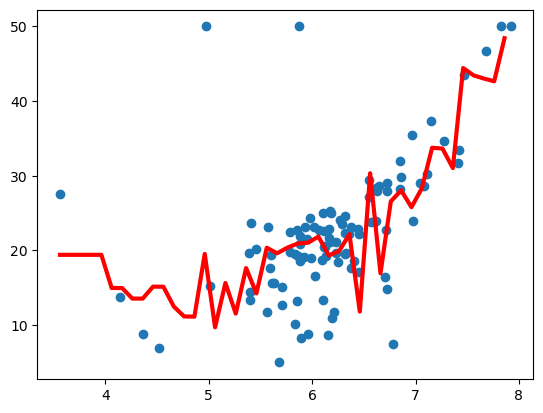

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
0.9183994607944673


In [11]:
#Grafica los datos de prueba junto con la predicción
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)
plt.show()
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(adr.score(X_train, y_train))